## Natural Language Processing:
Here I tried to do some expolatory data analysis of consumer complaints text data. Data is taken from Kaggle that is from Consumer Financial Protection Bureau (CFPB).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
%matplotlib inline

In [2]:
#load data
df = pd.read_csv('consumer_complaints.csv')
df.head()

//anaconda/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (5,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067


In [3]:
#Let count the number of complaints by company
df["company"].value_counts()

Bank of America                                       55998
Wells Fargo & Company                                 42024
JPMorgan Chase & Co.                                  33881
Equifax                                               31828
Experian                                              30905
Citibank                                              25540
TransUnion Intermediate Holdings, Inc.                25534
Ocwen                                                 20978
Capital One                                           15628
Nationstar Mortgage                                   13250
U.S. Bancorp                                           9554
Synchrony Financial                                    9435
Ditech Financial LLC                                   8679
Navient Solutions, Inc.                                8007
PNC Bank N.A.                                          6974
Encore Capital Group                                   6304
HSBC North America Holdings Inc.        

In [4]:
#let check the data only related to Wells Fargo and name it "wf"
wf=df.loc[df["company"]== 'Wells Fargo & Company']

In [5]:
wf.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
6,08/30/2013,Credit card,NaN,Credit line increase/decrease,NaN,NaN,NaN,Wells Fargo & Company,AZ,85730,NaN,NaN,Postal mail,09/05/2013,Closed with explanation,Yes,No,511062
13,08/30/2013,Mortgage,Other mortgage,"Application, originator, mortgage broker",NaN,NaN,NaN,Wells Fargo & Company,TX,78244,NaN,NaN,Fax,09/03/2013,Closed with explanation,Yes,Yes,510129
23,09/10/2013,Debt collection,Credit card,Communication tactics,Called outside of 8am-9pm,NaN,NaN,Wells Fargo & Company,GA,30132,NaN,NaN,Web,09/14/2013,Closed with explanation,Yes,No,521354


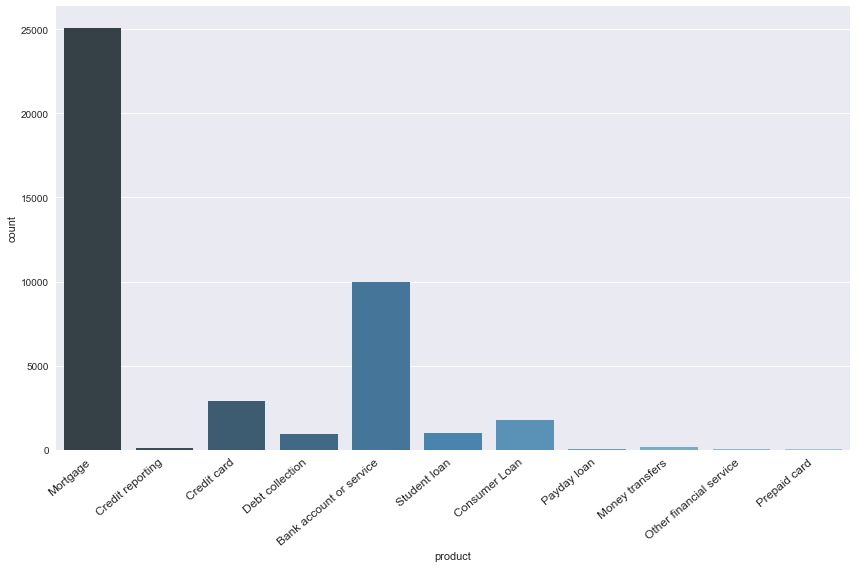

In [6]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x='product', data=wf, palette='Blues_d')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = 'right', fontsize = 12)
plt.tight_layout()
plt.show()

In [7]:
wf.rename(columns = {'consumer_disputed?':'consumer_disputed'},inplace = True)

//anaconda/envs/python3/lib/python3.6/site-packages/pandas/core/frame.py:2844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


//anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


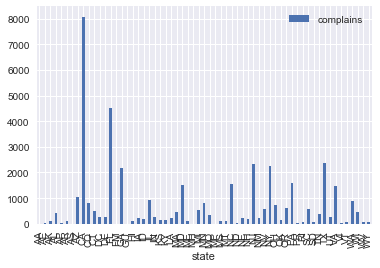

In [8]:
#lets look state wise complain
complain_flag = '1'*len(wf['state'])
wf['complains'] = [ int(x) for x in complain_flag if not x  == ',']
wf_state = wf.groupby('state').aggregate(np.sum)
wf_state.drop('complaint_id', axis = 1, inplace =  True)
wf_state.plot(kind = 'bar')

In [9]:
#State or US territory having maximum complaints
wf_state[wf_state['complains'] == wf_state['complains'].max()]

,complains
state,
CA,8084


In [10]:
#State or US territory having minimum complaints
wf_state[wf_state['complains'] == wf_state['complains'].min()]

,complains
state,
AS,1
MP,1


In [11]:
#lets group by product and find which product has more complains
wf_product = wf.groupby('product').aggregate(np.sum)
wf_product.drop('complaint_id', axis = 1, inplace =  True)

In [12]:
#max complain product
wf_product[wf_product['complains'] == wf_product['complains'].max()]

,complains
product,
Mortgage,25106


In [13]:
#min complain product
wf_product[wf_product['complains'] == wf_product['complains'].min()]

,complains
product,
Payday loan,15


## Now do some Text analysis
Reference: https://www.kaggle.com/mchirico/analyzing-text-in-consumer-complaints

In [14]:
from io import StringIO
import collections as co

In [15]:
# select data from "wf" that has consumer complaints
wf_text=wf[wf['consumer_complaint_narrative'].notnull()]

In [16]:
wf_text.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed,complaint_id,complains
190155,03/19/2015,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,In XX/XX/XXXX my wages that I earned at my job...,NaN,Wells Fargo & Company,CA,946XX,NaN,Consent provided,Web,03/19/2015,Closed with explanation,Yes,Yes,1290524,1
190238,03/19/2015,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,This complaint is against Wells Fargo Bank for...,NaN,Wells Fargo & Company,CA,931XX,NaN,Consent provided,Web,03/19/2015,Closed with explanation,Yes,No,1290532,1
191921,03/19/2015,Debt collection,I do not know,Cont'd attempts collect debt not owed,Debt is not mine,"I sent a letter regarding the matter however, ...",NaN,Wells Fargo & Company,MD,207XX,Servicemember,Consent provided,Web,04/13/2015,Closed with explanation,Yes,No,1292220,1
192396,03/19/2015,Mortgage,FHA mortgage,"Loan servicing, payments, escrow account",NaN,Wells Fargo Mortgage began foreclosure action ...,NaN,Wells Fargo & Company,AZ,853XX,NaN,Consent provided,Web,03/19/2015,Closed with explanation,Yes,Yes,1291277,1
194826,03/19/2015,Student loan,Non-federal student loan,Dealing with my lender or servicer,Having problems with customer service,My daughter 's father passe away and XXXX of h...,NaN,Wells Fargo & Company,CA,913XX,NaN,Consent provided,Web,03/19/2015,Closed with non-monetary relief,Yes,No,1292028,1


In [17]:
# We want a very fast way to concat strings.
#  Try += if you don't believe this method is faster.
s=StringIO()
wf['consumer_complaint_narrative'].apply(lambda x: s.write(str(x)))

k=s.getvalue()
s.close()
k=k.lower()
k=k.split()

In [18]:
# Next only want valid strings
words = co.Counter(nltk.corpus.words.words())
stopWords =co.Counter( nltk.corpus.stopwords.words() )
k=[i for i in k if i in words and i not in stopWords]
s=" ".join(k)
c = co.Counter(k)

In [19]:
# Take a look at the 10 most common words
c.most_common(10)

[('loan', 3586),
 ('would', 3213),
 ('account', 3056),
 ('mortgage', 2948),
 ('bank', 2549),
 ('credit', 2376),
 ('payment', 2239),
 ('told', 2220),
 ('home', 2113),
 ('get', 1587)]

In [20]:
s[0:100]

'wages job almost knew trouble home home loan early loan modification process told would assist anyth'

In [21]:
print(k[0:10],"\n\nLength of k %s" % len(k))

['wages', 'job', 'almost', 'knew', 'trouble', 'home', 'home', 'loan', 'early', 'loan'] 

Length of k 225132


## Visualization of data

In [22]:
from wordcloud import WordCloud

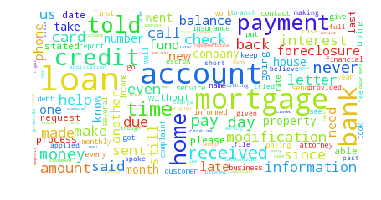

In [23]:
#Read the whole text.
text = s

#Generate a word cloud image
wordcloud = WordCloud().generate(text)

#take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(background_color="white",max_words=len(k),max_font_size=40, relative_scaling=.8).generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Now time to look the story of victims

In [24]:
# Let's get some text involving identity theft
searchS='victim of identity theft'
vi = wf[wf['consumer_complaint_narrative'].str.find(searchS) >= 0]
wf['victim']=None
wf['e']=1
wf['m']=None  # This will be for 'Closed with monetary relief'
wf['victim'] = wf[wf['consumer_complaint_narrative'].str.find(searchS) >= 0]
wf['m']=wf[wf['company_response_to_consumer'] == 'Closed with monetary relief']


# Take a look at some sample stories  mindex to mindex_inc
# Adjust this, to see different stories
mindex=15
mindex_inc=5+mindex
si=StringIO()
#vi['consumer_complaint_narrative'].iloc[mindex:mindex_inc].apply(lambda x: si.write(x+'\n___\n\n'))
vi['consumer_complaint_narrative'].iloc[mindex:mindex_inc].apply(lambda x: si.write(x+'\n'))

review_text=si.getvalue()
si.close()
print(review_text)

//anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
//anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
//anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

I was the victim of identity theft. On XXXX XXXX I noticed an unauthorized XXXX pending withdrawal from my wells fargo checking account to an account at XXXX XXXX. I requested this transfer be stopped on XXXX XXXX. Wells fargo denied my request to stop this illegal transferred allowed it to occur on XXXX XXXX. After contacting the XXXX, NJ police Wells fargo did request a return of my money from XXXX XXXX on XXXX XXXX. Since wells fargo could not guarantee the safety of my money I transferred most of my accounts to another bank. I did leave in enough money to cover my monthly automatic withdrawals as it would take time to notify all my accounts. Wells Fargo placed a hold on my newly formed account and would not allow bill payment until I spoke with a supervisor, XXXX, in fraud protection. Wells Fargo also sent my new checks and ATM card via postal service and I still do n't have then as of XXXX XXXX. Also every single day since the XXXX XXXX the Wells Fargo online system locks my accou

//anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
//anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [25]:
# We might be missing data on just fraud...
# Search for all cases of theft or fraud
searchS0='victim'
searchS1='identity'
searchS_OR=['theft','fraud']

vi2 = wf[(wf['consumer_complaint_narrative'].str.find(searchS0) >= 0) &
        (wf['consumer_complaint_narrative'].str.find(searchS1) >= 0) &
       ( (wf['consumer_complaint_narrative'].str.find(searchS_OR[0]) >= 0) |
        (wf['consumer_complaint_narrative'].str.find(searchS_OR[1]) >= 0))
        ]

In [26]:
# vi2.count()

g=vi2.groupby(['issue'])
gg=g.count().reset_index()
gg.sort_values(by='e',inplace=True)
gg=g['e','victim','m'].count().reset_index()
gg.sort_values(by='e',inplace=True, ascending=False)

In [27]:
# Taking a look at common complaints
# Need to format this...but note only 9 cases where it
# was "Closed with monetary relief"  m==1

#gg.head(4)
with pd.option_context('display.max_rows', 10, 'display.max_columns', 4):
    print(gg)

                                       issue   e  victim  m
0    Account opening, closing, or management  10       8  0
6      Identity theft / Fraud / Embezzlement   4       3  0
3      Cont'd attempts collect debt not owed   3       3  0
5                   Deposits and withdrawals   3       1  0
8   Making/receiving payments, sending money   2       1  1
..                                       ...  ..     ... ..
2                                Arbitration   1       0  0
4         Dealing with my lender or servicer   1       1  0
7   Loan servicing, payments, escrow account   1       0  0
9                 Managing the loan or lease   1       1  0
10                 Using a debit or ATM card   1       0  0

[11 rows x 4 columns]


## Lets practice data analysis using spaCy: 
(For more details look spaCy documentation)

In [30]:
##Now I want to analyze the review data using spaCy
import spacy
import itertools as it
nlp = spacy.load('en_core_web_sm')
# when I updated spacy2 and download data it is failed to create symlink automatecially
# so I need to use nlp = spacy.load('en_core_web_sm') instead nlp = spacy.load('en').

In [31]:
%%time
parsed_review = nlp(review_text)

CPU times: user 330 ms, sys: 105 ms, total: 435 ms
Wall time: 452 ms


In [32]:
print(parsed_review)

I was the victim of identity theft. On XXXX XXXX I noticed an unauthorized XXXX pending withdrawal from my wells fargo checking account to an account at XXXX XXXX. I requested this transfer be stopped on XXXX XXXX. Wells fargo denied my request to stop this illegal transferred allowed it to occur on XXXX XXXX. After contacting the XXXX, NJ police Wells fargo did request a return of my money from XXXX XXXX on XXXX XXXX. Since wells fargo could not guarantee the safety of my money I transferred most of my accounts to another bank. I did leave in enough money to cover my monthly automatic withdrawals as it would take time to notify all my accounts. Wells Fargo placed a hold on my newly formed account and would not allow bill payment until I spoke with a supervisor, XXXX, in fraud protection. Wells Fargo also sent my new checks and ATM card via postal service and I still do n't have then as of XXXX XXXX. Also every single day since the XXXX XXXX the Wells Fargo online system locks my accou

## What about sentence detection and segmentation ? Lets check!!

In [33]:
for num, sentence in enumerate(parsed_review.sents):
    print ('Sentence {}:'.format(num + 1))
    print (sentence)
    print ('')

Sentence 1:
I was the victim of identity theft.

Sentence 2:
On XXXX XXXX I noticed an unauthorized XXXX pending withdrawal from my wells fargo checking account to an account at XXXX XXXX.

Sentence 3:
I requested this transfer be stopped on XXXX XXXX.

Sentence 4:
Wells fargo denied my request to stop this illegal transferred allowed it to occur on XXXX XXXX.

Sentence 5:
After contacting the XXXX, NJ police Wells fargo did request a return of my money from XXXX XXXX on XXXX XXXX.

Sentence 6:
Since wells fargo could not guarantee the safety of my money I transferred most of my accounts to another bank.

Sentence 7:
I did leave in enough money to cover my monthly automatic withdrawals as it would take time to notify all my accounts.

Sentence 8:
Wells Fargo placed a hold on my newly formed account and would not allow bill payment until I spoke with a supervisor, XXXX, in fraud protection.

Sentence 9:
Wells Fargo also sent my new checks and ATM card via postal service and I still do n

## Check name entity detection ??

In [34]:
for num, entity in enumerate(parsed_review.ents):
    print ('Entity {}:'.format(num + 1), entity, '-', entity.label_)
    print ('')

Entity 1: XXXX XXXX - PERSON

Entity 2: XXXX - PERSON

Entity 3: XXXX XXXX - PERSON

Entity 4: XXXX XXXX - PERSON

Entity 5: Wells - PERSON

Entity 6: XXXX XXXX - PERSON

Entity 7: NJ - ORG

Entity 8: Wells - ORG

Entity 9: XXXX XXXX - PERSON

Entity 10: XXXX XXXX - PERSON

Entity 11: monthly - DATE

Entity 12: Wells Fargo - ORG

Entity 13: XXXX - PERSON

Entity 14: Wells Fargo - ORG

Entity 15: ATM - ORG

Entity 16: XXXX XXXX - PERSON

Entity 17: every single day - DATE

Entity 18: the XXXX XXXX - PERSON

Entity 19: Wells Fargo - ORG

Entity 20: Wells Fargo - ORG

Entity 21: XXXX Police Department - ORG

Entity 22: California - GPE

Entity 23: Identity Theft Affidavit - PERSON

Entity 24: Wells Fargo Bank - ORG

Entity 25: XXXX - PERSON

Entity 26: XXXX - PERSON

Entity 27: XXXX - PERSON

Entity 28: Wells Fargo Bank - ORG

Entity 29: three - CARDINAL

Entity 30: Wells Fargo - ORG

Entity 31: XXXX - PERSON

Entity 32: Well Fargo Bank Fraud Department - ORG

Entity 33: two to three minu

## Part of speech tagging !!!!

In [35]:
import pandas as pd
token_text = [token.orth_ for token in parsed_review]
token_pos = [token.pos_ for token in parsed_review]

pd.DataFrame(list(zip(token_text, token_pos)),
             columns=['token_text', 'part_of_speech'])

,token_text,part_of_speech
0,I,PRON
1,was,VERB
2,the,DET
3,victim,NOUN
4,of,ADP
5,identity,NOUN
6,theft,NOUN
7,.,PUNCT
8,On,ADP
9,XXXX,PROPN


## Text normalization, like stemming/lemmatization and shape analysis

In [36]:
token_lemma = [token.lemma_ for token in parsed_review]
token_shape = [token.shape_ for token in parsed_review]

pd.DataFrame(list(zip(token_text, token_lemma, token_shape)),
             columns=['token_text', 'token_lemma', 'token_shape'])

,token_text,token_lemma,token_shape
0,I,-PRON-,X
1,was,be,xxx
2,the,the,xxx
3,victim,victim,xxxx
4,of,of,xx
5,identity,identity,xxxx
6,theft,theft,xxxx
7,.,.,.
8,On,on,Xx
9,XXXX,xxxx,XXXX


## Token-level entity analysis

In [37]:
token_entity_type = [token.ent_type_ for token in parsed_review]
token_entity_iob = [token.ent_iob_ for token in parsed_review]

pd.DataFrame(list(zip(token_text, token_entity_type, token_entity_iob)),
             columns=['token_text', 'entity_type', 'inside_outside_begin'])

,token_text,entity_type,inside_outside_begin
0,I,,O
1,was,,O
2,the,,O
3,victim,,O
4,of,,O
5,identity,,O
6,theft,,O
7,.,,O
8,On,,O
9,XXXX,PERSON,B


In [38]:
token_attributes = [(token.orth_,
                     token.prob,
                     token.is_stop,
                     token.is_punct,
                     token.is_space,
                     token.like_num,
                     token.is_oov)
                    for token in parsed_review]

df = pd.DataFrame(token_attributes,
                  columns=['text',
                           'log_probability',
                           'stop?',
                           'punctuation?',
                           'whitespace?',
                           'number?',
                           'out of vocab.?'])

df.loc[:, 'stop?':'out of vocab.?'] = (df.loc[:, 'stop?':'out of vocab.?']
                                       .applymap(lambda x: u'Yes' if x else u''))
                                               
df

,text,log_probability,stop?,punctuation?,whitespace?,number?,out of vocab.?
0,I,-20.0,,,,,Yes
1,was,-20.0,Yes,,,,Yes
2,the,-20.0,Yes,,,,Yes
3,victim,-20.0,,,,,Yes
4,of,-20.0,Yes,,,,Yes
5,identity,-20.0,,,,,Yes
6,theft,-20.0,,,,,Yes
7,.,-20.0,,Yes,,,Yes
8,On,-20.0,,,,,Yes
9,XXXX,-20.0,,,,,Yes
